# タイソンによるオレゴネーターの簡略化モデル
$$
\begin{equation}
\begin{array}{rcl}
\displaystyle
\epsilon_1 \frac{du}{d\tau} & =&  u(1-u)-\frac{bv(u-a)}{u+a}  \\
\displaystyle
\frac{dv}{d\tau} & =&  u-v 
\end{array}
\end{equation}
$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

In [2]:
def tyson(t, x, a, b, e):
    return [(x[0]*(1-x[0]) - b*x[1]*(x[0]-a)/(x[0]+a))/e, x[0] - x[1]]

In [3]:
a=0.01
b=1
e=0.1
t0 = 0.0

In [4]:
t1 = 100.0
x0 = [0.1, 0.4]
s0 = solve_ivp(tyson, [t0, t1], x0, args=([a,b,e]), method='DOP853', dense_output=True)

<ipython-input-5-09ea43553d90>:18: RuntimeWarning: invalid value encountered in true_divide
  U, V = U/np.hypot(U, V), V/np.hypot(U, V)


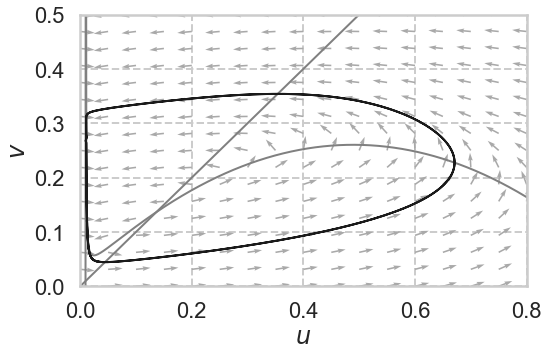

In [5]:
def f(x, y):
    return (x*(1-x) - b*y*(x-a)/(x+a))/e
def g(x,y):
    return x - y
N = 20000
T = np.linspace(t0, t1, N)
sol = s0.sol(T)
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_xlim(0.,0.8)
ax.set_ylim(0.,0.5)
Nx, Ny = 17, 17
X, Y = np.meshgrid(np.linspace(0.0, 0.8, Nx), np.linspace(0.0, 0.5, Ny))
U, V = f(X, Y), g(X, Y)
U, V = U/np.hypot(U, V), V/np.hypot(U, V)
ax.quiver(X, Y, U, V, color='darkgray', angles='xy')
ax.plot(np.linspace(0,0.8,2), np.linspace(0,0.8,2), '-', color='gray')
X2 = np.linspace(0,0.8,1024)
ax.plot(X2, (X2+a)*X2*(1-X2)/(b*(X2-a)), '-', color='gray')
ax.plot(sol.T[-N//10:,0], sol.T[-N//10:,1], '-k')
# plt.savefig("tyson.pdf", bbox_inches='tight')